In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import pandas as pd

# Change to your data directory
basedir = Path('/Volumes/data-1/behavior/hakan')


## Figure S1C

### Load feeding data


In [2]:
data_path = basedir/'Kucukdereli_atal_data/stim_triggered_feeding.h5'

feeding_data = pd.read_hdf(data_path, key='data')


### Plot stimulation triggered food consumption

In [3]:
from scipy.stats import ttest_rel

import matplotlib.pyplot as plt

font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('axes', linewidth=0.8)

colors = {'gray':'#D4D4D4', 'darkgray':'#545454'}


P = 0.00000002, n = 13


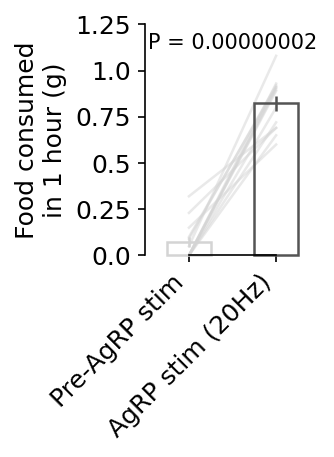

In [8]:
fig, ax = plt.subplots(1,1,figsize=(1.5,2), dpi=150)

feeding_data[['pre-stim','stim']].transpose().plot(ax=ax, kind='line', linewidth=1.2, color=colors['gray'], alpha=0.5, legend=False)

feeding_data[['pre-stim','stim']].mean(axis=0).plot.bar(ax=ax, yerr=feeding_data[['pre-stim','stim']].sem(axis=0), clip_on=False, zorder=2,
                                            fill=False, edgecolor=[colors['gray'],colors['darkgray']], linewidth=1.2,
                                            error_kw={'capsize':0, 'elinewidth':1.2, 'ecolor':[colors['gray'],colors['darkgray']]})

ax.set_ylim([0,1.25])
ax.set_yticks(np.arange(0,1.26,0.25))
ax.set_yticklabels(np.arange(0,1.26,0.25))

ax.set_xticklabels(['Pre-AgRP stim', 'AgRP stim (20Hz)'], y=0, ha='right', rotation=45)

ax.set_xlabel('')
ax.set_ylabel('Food consumed\nin 1 hour (g)')

ax.spines[['top','right']].set_visible(False)
ax.spines['bottom'].set_bounds(0,1)

# Run stats
t, p = ttest_rel(feeding_data['pre-stim'], feeding_data['stim'])
ax.text(x=0.5, y=1.15, s=f'P = {p:.8f}', ha='center', va='center', fontsize=10)

print(f'P = {p:.8f}, n = {len(feeding_data)}')
